## 10.1 
Compute, by hand, the second-order Lagrange polynormial for the points $x = \{0,2,4\}$ and $f(x) = \{1,0.223891,-0.39715\}$. If $f(3) = -0.260052$, how accurate is the interpolation at this point. Plot your interpolating polynomial for $x \in [0,5]$. The points were generated from the Bessel function of the first kind, $J_0 (x)$. Compare your interpolating polynomial to the actual function.

## Solution

The general Lagrange interpolation formula is as follows

$$P_n(x) = \sum_{i=0}^{n} f(a_i) \frac{\prod_{j=0, j\neq i}^n (x-x_j)}{\prod_{j=0, j\neq i}^n (x_i-x_j)}.$$

Expanding the above for $n = 2$ and substituting the given information

$$P(x) = f(0) \frac{(x - x_1)(x - x_2)}{(x_0 - x_1)(x_0 - x_2)} + f(2) \frac{(x - x_0)(x - x_2)}{(x_1 - x_0)(x_1 - x_2)} + f(4) \frac{(x - x_0)(x - x_1)}{(x_2 - x_0)(x_2 - x_1)},$$

$$P(x) = \frac{(x - 2)(x - 4)}{(0 - 2)(0 - 4)} + 0.223891 \frac{(x - 0)(x - 4)}{(2 - 0)(2 - 4)} - 0.39715 \frac{(x - 0)(x - 2)}{(4 - 0)(4 - 2)},$$

$$P(x) = \frac{(x - 2)(x - 4)}{8} - 0.223891 \frac{x(x - 4)}{4} - 0.39715 \frac{x(x - 2)}{8},$$

$$P(x) = x^2\Bigg(\frac{1}{8} - \frac{0.223891}{4} - \frac{0.39715}{8}\Bigg) + x\Bigg(-\frac{3}{4} + 0.223891 + \frac{0.39715}{4}\Bigg) + 1,$$

$$P(x) = 0.0193835 x^2 - 0.4268215 x + 1.$$

The $\tt{SciPy}$ module $\tt{special}$ has a function $\tt{jv}$ which can be used to caclulate $J_0(x)$. $P(x)$ as calculated above is defined using a $\texttt{lambda}$ function, such that it can be plotted along side $J_0(x)$ on the bound $[0,5]$.

Comparing at x = 3:
J_0(3) = −0.260052
P(3) = -0.10601300000000013


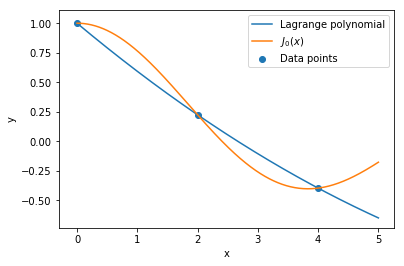

In [2]:
import numpy as np
from scipy.special import jv
import matplotlib.pyplot as plt
%matplotlib inline

# Lambda function for lagrange polynomial
lagrangePoly = lambda x: 0.0193835*x**2 - 0.4268215*x + 1

# Given data points
datax = [0,2,4]
datay = [1,0.223891,-0.39715]

# Compare against J_0(3)
print('Comparing at x = 3:')
print('J_0(3) = −0.260052')
print('P(3) =',lagrangePoly(3))

# Plot against J_0(x)
x = np.linspace(0,5,1000)
plt.plot(x,lagrangePoly(x),label='Lagrange polynomial')
plt.plot(x,jv(0,x),label='$J_0(x)$')
plt.scatter(datax,datay,label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()